In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#IMBD情意分析（正評or負評）

In [ ]:
%env keras_backend=tensorflow

env: keras_backend=tensorflow


In [ ]:
#讀入電影資料庫讀入電影資料庫
from keras.datasets import imdb

In [ ]:
(x_train,y_train) , (x_test,y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

25000

In [ ]:
len(x_test)

25000

In [ ]:
len(y_train)

25000

In [ ]:
x_train[99] #號碼代表文字

[1,
 1230,
 3765,
 566,
 97,
 189,
 102,
 86,
 7,
 32,
 4,
 973,
 16,
 55,
 355,
 18,
 14,
 20,
 4,
 64,
 542,
 173,
 16,
 4,
 893,
 2115,
 5376,
 250,
 39,
 8013,
 4,
 1362,
 2,
 14,
 102,
 47,
 57,
 599,
 633,
 6,
 1317,
 2,
 8,
 6,
 189,
 20,
 57,
 206,
 57,
 116,
 5,
 57,
 836,
 82,
 6,
 1317,
 2,
 3728,
 2,
 9,
 6,
 52,
 284,
 21,
 29,
 9,
 38,
 2245,
 5,
 1044,
 11,
 14,
 15,
 45,
 619,
 50,
 71,
 6,
 171,
 531,
 15,
 71,
 424,
 8,
 30,
 163,
 6211,
 4,
 1629,
 189,
 212,
 102,
 5,
 57,
 31,
 1498,
 11,
 4,
 311,
 13,
 197,
 15,
 14,
 20,
 16,
 1150,
 1479,
 5,
 13,
 161,
 990,
 692,
 5,
 1706,
 12,
 69,
 77,
 1194,
 8,
 3245,
 2001,
 553,
 67,
 14,
 20,
 48,
 25,
 423,
 13,
 131,
 124,
 51,
 25,
 122,
 236,
 1506,
 198,
 4,
 64,
 552,
 7,
 415,
 37,
 62,
 169,
 14,
 20,
 60,
 2602,
 629,
 5,
 615,
 14,
 9,
 8,
 25,
 1230,
 3765,
 570,
 231,
 189,
 102,
 14,
 20,
 166,
 2039,
 168,
 40,
 2450,
 5486,
 3298]

In [ ]:
y_train[99] #0=negative 1=positive

0

In [ ]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
from keras.preprocessing import sequence

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
#統一shape(取前一百筆)
x_train = sequence.pad_sequences(x_train,maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

In [ ]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

打造ＲＮＮ

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [ ]:
#open model
model = Sequential()

In [ ]:
#input layer
model.add(Embedding(10000,128)) #dim(10000) to dim(128) 10000為input的維度

In [ ]:
#RNN layer
model.add(LSTM(128))

In [ ]:
#output layer
model.add(Dense(1,activation="relu"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [ ]:
x_train.shape

(25000, 100)

In [ ]:
model.fit(x_train,y_train,batch_size=30,epochs=4)

Epoch 1/4
834/834 [==============================] - 112s 132ms/step - loss: 0.6142 - accuracy: 0.6891
Epoch 2/4
834/834 [==============================] - 108s 130ms/step - loss: 0.4348 - accuracy: 0.8262
Epoch 3/4
834/834 [==============================] - 109s 130ms/step - loss: 0.3508 - accuracy: 0.8814
Epoch 4/4
834/834 [==============================] - 109s 131ms/step - loss: 0.3869 - accuracy: 0.8594


評估模型

In [ ]:
score=model.evaluate(x_test,y_test)

782/782 [==============================] - 27s 33ms/step - loss: 0.5333 - accuracy: 0.7863


In [1]:
print(score)

NameError: ignored

#存檔

In [ ]:
model.save("myrnn.h5")

##範例二

In [ ]:
#通膨與失業率
cpi = pd.read_csv("/CPIAUCSL.csv")
unem = pd.read_csv("/UNRATE.csv")

In [ ]:
cpi,unem

(           DATE  CPIAUCSL_PCH
 0    1970-01-01       0.53050
 1    1970-02-01       0.52770
 2    1970-03-01       0.52493
 3    1970-04-01       0.52219
 4    1970-05-01       0.25974
 ..          ...           ...
 622  2021-11-01       0.69923
 623  2021-12-01       0.57517
 624  2022-01-01       0.64507
 625  2022-02-01       0.79771
 626  2022-03-01       1.24075
 
 [627 rows x 2 columns],            DATE  UNRATE
 0    1970-01-01     3.9
 1    1970-02-01     4.2
 2    1970-03-01     4.4
 3    1970-04-01     4.6
 4    1970-05-01     4.8
 ..          ...     ...
 622  2021-11-01     4.2
 623  2021-12-01     3.9
 624  2022-01-01     4.0
 625  2022-02-01     3.8
 626  2022-03-01     3.6
 
 [627 rows x 2 columns])

In [ ]:
cpi = cpi["CPIAUCSL_PCH"]
unem = unem["UNRATE"]

In [ ]:
cpi

0      0.53050
1      0.52770
2      0.52493
3      0.52219
4      0.25974
        ...   
622    0.69923
623    0.57517
624    0.64507
625    0.79771
626    1.24075
Name: CPIAUCSL_PCH, Length: 627, dtype: float64

In [ ]:
len(cpi)

627

In [ ]:
#分割資料分割資料
#Dont do this
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(unem["UNRATE"],cpi["CPIAUCSL_PCH"],test_size=0.3)
test_size=0.3
x_train = unem[0:int(len(unem)*(1-test_size))]
x_test = unem[0:int(len(unem)*(test_size))]
y_train = cpi[0:int(len(cpi)*(1-test_size))]
y_test = cpi[0:int(len(cpi)*(test_size))]

In [ ]:
x_train.shape

(438,)

In [ ]:
x_train

0      3.9
1      4.2
2      4.4
3      4.6
4      4.8
      ... 
433    4.8
434    4.7
435    4.7
436    4.6
437    4.6
Name: UNRATE, Length: 438, dtype: float64

In [ ]:
model = Sequential()

In [ ]:
x_train.shape

In [ ]:
x_train

In [ ]:
x_train.shape

In [ ]:
model.add(LSTM(units = 10,return_sequences = True , input_shape=(1,1)))

In [ ]:
model.add(LSTM(12,return_sequences = False))

In [ ]:
model.add(Dense(25,activation="sigmoid"))

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss = "mean_squared_error",optimizer="adam")


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 10)             480       
                                                                 
 lstm_4 (LSTM)               (None, 12)                1104      
                                                                 
 dense_2 (Dense)             (None, 25)                325       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,935
Trainable params: 1,935
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,batch_size=20,epochs=30)

Epoch 1/30
22/22 [==============================] - 4s 4ms/step - loss: 0.1028
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.1000
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 7/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 8/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 9/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0997
Epoch 10/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 11/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 12/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0998
Epoch 13/30
22/22 [==============================

In [ ]:
score=model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 4ms/step - loss: 0.1462


In [ ]:
print(score)

0.14624007046222687


In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [ ]:
print(testPredict)

[[0.3821771 ]
 [0.3835883 ]
 [0.3845266 ]
 [0.38545746]
 [0.38637683]
 [0.38683116]
 [0.38728148]
 [0.38772732]
 [0.3890356 ]
 [0.38946107]
 [0.39110473]
 [0.39188954]
 [0.39110473]
 [0.39110473]
 [0.3915003 ]
 [0.39110473]
 [0.39110473]
 [0.39110473]
 [0.3915003 ]
 [0.39188954]
 [0.3915003 ]
 [0.39070284]
 [0.3915003 ]
 [0.3915003 ]
 [0.39070284]
 [0.39029488]
 [0.39070284]
 [0.39029488]
 [0.39029488]
 [0.39029488]
 [0.3898809 ]
 [0.3898809 ]
 [0.38946107]
 [0.3898809 ]
 [0.38860467]
 [0.3881685 ]
 [0.38683116]
 [0.38728148]
 [0.38683116]
 [0.38728148]
 [0.38683116]
 [0.38683116]
 [0.38637683]
 [0.38637683]
 [0.38637683]
 [0.38545746]
 [0.38637683]
 [0.38683116]
 [0.38772732]
 [0.3881685 ]
 [0.38772732]
 [0.38772732]
 [0.38772732]
 [0.3890356 ]
 [0.38946107]
 [0.38946107]
 [0.39110473]
 [0.3915003 ]
 [0.3937384 ]
 [0.39573985]
 [0.39831161]
 [0.39831161]
 [0.39953372]
 [0.39998457]
 [0.4004149 ]
 [0.39998457]
 [0.39953372]
 [0.39906153]
 [0.39906153]
 [0.39906153]
 [0.39881718]
 [0.39

In [ ]:
y_test

0      0.53050
1      0.52770
2      0.52493
3      0.52219
4      0.25974
        ...   
183    0.18727
184    0.18692
185    0.27985
186    0.18605
187    0.18570
Name: CPIAUCSL_PCH, Length: 188, dtype: float64

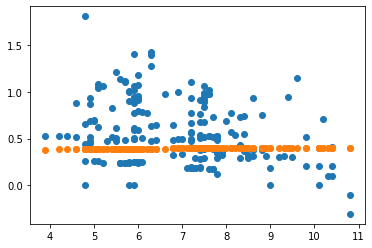

In [ ]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,testPredict)

## 範例三 用前幾期的資料預測下一期

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
df = pd.read_csv("/SP500.csv")

In [ ]:
df

,DATE,SP500
0,2012-04-26,1399.98
1,2012-04-27,1403.36
2,2012-04-30,1397.91
3,2012-05-01,1405.82
4,2012-05-02,1402.31
...,...,...
2603,2022-04-19,4462.21
2604,2022-04-20,4459.45
2605,2022-04-21,4393.66
2606,2022-04-22,4271.78


In [ ]:
close_data = df['SP500'].values

In [ ]:
close_data

array(['1399.98', '1403.36', '1397.91', ..., '4393.66', '4271.78',
       '4296.12'], dtype=object)

In [ ]:
count=0
mylist=[]
for i in range(len(close_data)):
    mylist.append(float(close_data[i]))
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


ValueError: ignored

In [ ]:
close_data[22] == "."

True

In [ ]:
deldata = np.where(close_data == ".")

In [ ]:
deldata

(array([  22,   49,   92,  132,  133,  150,  173,  178,  192,  212,  241,
         282,  310,  352,  415,  434,  439,  452,  472,  516,  542,  571,
         612,  675,  695,  700,  712,  732,  766,  802,  831,  877,  935,
         956,  961,  972,  992, 1021, 1067, 1092, 1137, 1195, 1217, 1222,
        1232, 1257, 1296, 1327, 1353, 1397, 1455, 1477, 1482, 1492, 1517,
        1546, 1587, 1614, 1657, 1715, 1724, 1738, 1743, 1757, 1777, 1821,
        1847, 1875, 1917, 1980, 1999, 2004, 2017, 2037, 2076, 2107, 2136,
        2182, 2240, 2261, 2266, 2277, 2297, 2331, 2372, 2397, 2442, 2500,
        2521, 2537, 2562, 2601]),)

In [ ]:
close_data = np.delete(close_data, deldata)

In [ ]:
close_data = np.array(close_data,dtype=float)

In [ ]:
close_data

array([1399.98, 1403.36, 1397.91, ..., 4393.66, 4271.78, 4296.12])

In [ ]:
close_data = close_data.reshape((-1,1))

In [ ]:
close_data

array([[1399.98],
       [1403.36],
       [1397.91],
       ...,
       [4393.66],
       [4271.78],
       [4296.12]])

In [ ]:
len(close_data)

2516

In [ ]:
close_data

array([[1399.98],
       [1403.36],
       [1397.91],
       ...,
       [4393.66],
       [4271.78],
       [4296.12]])

In [ ]:
##別這樣分
##x_train,x_test,y_train,y_test = train_test_split(close_data,close_data,test_size=0.3)
test_size=0.3
x_train = close_data[0:int(len(close_data)*(1-test_size))]
x_test = close_data[int(len(close_data)*(test_size)):len(close_data)]
y_train = x_train
y_test = x_test

In [ ]:
len(x_train)

1761

In [ ]:
##拿前幾期的股價來預測
look_back = 15

train_generator = TimeseriesGenerator(x_train, x_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(x_test, x_test, length=look_back, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100,activation='relu',return_sequences = True,input_shape=(look_back,1)))
model.add(LSTM(100,activation='relu',return_sequences = False))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(train_generator, epochs=25)

Epoch 1/25
88/88 [==============================] - 4s 24ms/step - loss: 1263619.3750
Epoch 2/25
88/88 [==============================] - 2s 24ms/step - loss: 2804.6477
Epoch 3/25
88/88 [==============================] - 2s 24ms/step - loss: 3425.0845
Epoch 4/25
88/88 [==============================] - 2s 24ms/step - loss: 3479.4287
Epoch 5/25
88/88 [==============================] - 2s 24ms/step - loss: 3298.7236
Epoch 6/25
88/88 [==============================] - 2s 24ms/step - loss: 2841.0442
Epoch 7/25
88/88 [==============================] - 2s 24ms/step - loss: 3113.7864
Epoch 8/25
88/88 [==============================] - 2s 24ms/step - loss: 2643.3413
Epoch 9/25
88/88 [==============================] - 2s 24ms/step - loss: 3076.0837
Epoch 10/25
88/88 [==============================] - 2s 24ms/step - loss: 3057.7419
Epoch 11/25
88/88 [==============================] - 2s 24ms/step - loss: 3243.2761
Epoch 12/25
88/88 [==============================] - 2s 24ms/step - loss: 3448.318

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 15, 100)           40800     
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
testPredict = model.predict(test_generator)

In [ ]:
testPredict

array([[2128.1978],
       [2125.531 ],
       [2124.929 ],
       ...,
       [4564.4844],
       [4547.9106],
       [4540.8447]], dtype=float32)

In [ ]:
y_test

array([[2114.76],
       [2106.85],
       [2085.51],
       ...,
       [4393.66],
       [4271.78],
       [4296.12]])

In [ ]:
len(testPredict)

1747

In [ ]:
len(y_test)

1762

In [ ]:
y_ori = y_test[0:len(testPredict)]

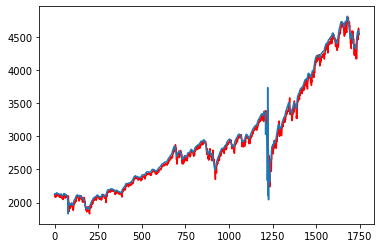

In [ ]:
plt.plot(y_ori,color="red")
plt.plot(testPredict)